In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [8]:
#Importing NC Covid data
df_NC=pd.read_csv(r'/Users/jryan120/Desktop/NC_Covid_Hosp.csv', parse_dates=['Date'])

df_NC

,Date,Hospitalizations,Adult ICU COVID-19 Patients,Suspected Patient Admitted - Last 24 Hours,Confirmed Patient Admitted - Last 24 Hours
0,2020-11-30,"2,033",485.0,241.0,206.0
1,2020-11-29,"1,956",457.0,256.0,233.0
2,2020-11-28,"1,879",454.0,262.0,246.0
3,2020-11-27,"1,826",450.0,198.0,178.0
4,2020-11-26,"1,806",445.0,274.0,238.0
...,...,...,...,...,...
234,2020-04-10,362,NaN,NaN,NaN
235,2020-04-09,446,NaN,NaN,NaN
236,2020-04-08,420,NaN,NaN,NaN
237,2020-04-07,410,NaN,NaN,NaN


In [9]:
#Changed data type of 'Hospitalizations'
df_NC['Hospitalizations'] = df_NC['Hospitalizations'].str.replace(',', '').astype(float)

In [10]:
df_NC.dtypes

Date                                          datetime64[ns]
Hospitalizations                                     float64
Adult ICU COVID-19 Patients                          float64
Suspected Patient Admitted - Last 24 Hours           float64
Confirmed Patient Admitted - Last 24 Hours           float64
dtype: object

In [11]:
df_NC

,Date,Hospitalizations,Adult ICU COVID-19 Patients,Suspected Patient Admitted - Last 24 Hours,Confirmed Patient Admitted - Last 24 Hours
0,2020-11-30,2033.0,485.0,241.0,206.0
1,2020-11-29,1956.0,457.0,256.0,233.0
2,2020-11-28,1879.0,454.0,262.0,246.0
3,2020-11-27,1826.0,450.0,198.0,178.0
4,2020-11-26,1806.0,445.0,274.0,238.0
...,...,...,...,...,...
234,2020-04-10,362.0,NaN,NaN,NaN
235,2020-04-09,446.0,NaN,NaN,NaN
236,2020-04-08,420.0,NaN,NaN,NaN
237,2020-04-07,410.0,NaN,NaN,NaN


In [12]:
#Converted 'Date' to Timestamp

from datetime import date

sdate=pd.Timestamp(date(2020,4,30))
edate=pd.Timestamp(date(2020,11,1))

df_NCR=df_NC[(df_NC['Date']>sdate) & (df_NC['Date']<edate)]
df_NCR

,Date,Hospitalizations,Adult ICU COVID-19 Patients,Suspected Patient Admitted - Last 24 Hours,Confirmed Patient Admitted - Last 24 Hours
30,2020-10-31,1138.0,335.0,263.0,142.0
31,2020-10-30,1176.0,349.0,276.0,155.0
32,2020-10-29,1201.0,343.0,289.0,152.0
33,2020-10-28,1179.0,339.0,278.0,153.0
34,2020-10-27,1175.0,325.0,293.0,145.0
...,...,...,...,...,...
209,2020-05-05,546.0,NaN,NaN,NaN
210,2020-05-04,564.0,NaN,NaN,NaN
211,2020-05-03,527.0,NaN,NaN,NaN
212,2020-05-02,504.0,NaN,NaN,NaN


In [279]:
df_NCR.sort_values('Date', axis=0, ascending=True, inplace=True)
df_NCR

<ipython-input-279-830c29cdbd4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NCR.sort_values('Date', axis=0, ascending=True, inplace=True)


,Date,Hospitalizations,Adult ICU COVID-19 Patients,Suspected Patient Admitted - Last 24 Hours,Confirmed Patient Admitted - Last 24 Hours
213,2020-05-01,532.0,NaN,NaN,NaN
212,2020-05-02,504.0,NaN,NaN,NaN
211,2020-05-03,527.0,NaN,NaN,NaN
210,2020-05-04,564.0,NaN,NaN,NaN
209,2020-05-05,546.0,NaN,NaN,NaN
208,2020-05-06,550.0,NaN,NaN,NaN
207,2020-05-07,539.0,NaN,NaN,NaN
206,2020-05-08,538.0,NaN,NaN,NaN
205,2020-05-09,466.0,NaN,NaN,NaN
204,2020-05-10,485.0,NaN,NaN,NaN


In [13]:
#Importing Gauteng Covid data

df_GT=pd.read_csv(r'/Users/jryan120/Desktop/Gauteng_Covid_data1.csv')

df_GT

,date,YYYYMMDD,Ekurhulene_Cases,Johannesburg_Cases,Sedibeng_Cases,Tshwane_Cases,WestRand_Cases,GPUnallocated_Cases,GP Cases,GP_Recoveries,GP_Hospitalisations,GP_Deaths,source,Comment
0,10/4/20,20200410,120.0,446.0,6.0,90.0,12.0,127.0,801,NaN,NaN,NaN,https://twitter.com/bandilemasuku/status/12488...,NaN
1,11/4/20,20200411,141.0,467.0,6.0,92.0,30.0,77.0,813,NaN,NaN,NaN,https://twitter.com/bandilemasuku/status/12492...,NaN
2,12/4/20,20200412,141.0,508.0,8.0,101.0,30.0,77.0,865,350.0,NaN,NaN,https://twitter.com/bandilemasuku/status/12496...,NaN
3,13-04-2020,20200413,148.0,551.0,9.0,100.0,35.0,66.0,909,399.0,NaN,NaN,https://twitter.com/GautengHealth/status/12503...,NaN
4,15-04-2020,20200415,161.0,558.0,8.0,104.0,35.0,64.0,930,479.0,NaN,NaN,https://twitter.com/bandilemasuku/status/12507...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,12/11/20,20201112,NaN,NaN,NaN,NaN,NaN,NaN,231074,224817.0,NaN,4873.0,https://www.nicd.ac.za/latest-confirmed-cases-...,No GDOH Release
216,13-11-2020,20201113,NaN,NaN,NaN,NaN,NaN,NaN,231277,224817.0,NaN,4877.0,https://www.nicd.ac.za/latest-confirmed-cases-...,No GDOH Release
217,14-11-2020,20201114,NaN,NaN,NaN,NaN,NaN,NaN,231479,224817.0,NaN,4877.0,https://www.nicd.ac.za/latest-confirmed-cases-...,No GDOH Release
218,15-11-2020,20201115,NaN,NaN,NaN,NaN,NaN,NaN,231643,224840.0,NaN,4882.0,NaN,No GDOH Release


In [14]:
df_GT.dtypes

date                    object
YYYYMMDD                 int64
Ekurhulene_Cases       float64
Johannesburg_Cases     float64
Sedibeng_Cases         float64
Tshwane_Cases          float64
WestRand_Cases         float64
GPUnallocated_Cases    float64
GP Cases                 int64
GP_Recoveries          float64
GP_Hospitalisations    float64
GP_Deaths              float64
source                  object
Comment                 object
dtype: object

In [15]:
may=df_GT['YYYYMMDD']>=20200430
oct=df_GT['YYYYMMDD']<20201101
df_GTR=df_GT[may & oct]


In [16]:

df_GTR['GP_Hospitalisations']

19       72.0
20       70.0
21       70.0
22       69.0
23       68.0
        ...  
199    1718.0
200    1718.0
201    1868.0
202    1661.0
203    1656.0
Name: GP_Hospitalisations, Length: 185, dtype: float64

In [17]:
df_GTR

,date,YYYYMMDD,Ekurhulene_Cases,Johannesburg_Cases,Sedibeng_Cases,Tshwane_Cases,WestRand_Cases,GPUnallocated_Cases,GP Cases,GP_Recoveries,GP_Hospitalisations,GP_Deaths,source,Comment
19,30-04-2020,20200430,319.0,840.0,16.0,172.0,44.0,55.0,1446,948.0,72.0,NaN,https://twitter.com/GautengHealth/status/12562...,NaN
20,1/5/20,20200501,328.0,865.0,18.0,187.0,45.0,64.0,1507,948.0,70.0,12.0,https://twitter.com/GautengHealth/status/12565...,NaN
21,2/5/20,20200502,349.0,920.0,19.0,201.0,45.0,64.0,1598,979.0,70.0,NaN,https://twitter.com/GautengHealth/status/12568...,NaN
22,3/5/20,20200503,358.0,935.0,21.0,201.0,45.0,64.0,1624,1015.0,69.0,NaN,https://twitter.com/GautengHealth/status/12572...,NaN
23,4/5/20,20200504,360.0,954.0,21.0,211.0,51.0,64.0,1661,1026.0,68.0,NaN,https://twitter.com/GautengHealth/status/12576...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,27-10-2020,20201027,50684.0,90678.0,15349.0,51564.0,14539.0,4745.0,227559,207060.0,1718.0,4711.0,https://twitter.com/GautengHealth/status/13214...,NaN
200,28-10-2020,20201028,50744.0,90753.0,15363.0,51679.0,14549.0,4745.0,227833,207211.0,1718.0,4713.0,GDOH Media Release 29 October 2020,NaN
201,29-10-2020,20201029,50793.0,90864.0,15376.0,51782.0,14566.0,4747.0,228128,207316.0,1868.0,4717.0,https://twitter.com/GautengHealth/status/13221...,NaN
202,30-10-2020,20201030,50858.0,90958.0,15396.0,51881.0,14590.0,4749.0,228432,207697.0,1661.0,4719.0,GDOH Media Release 31 October 2020,NaN


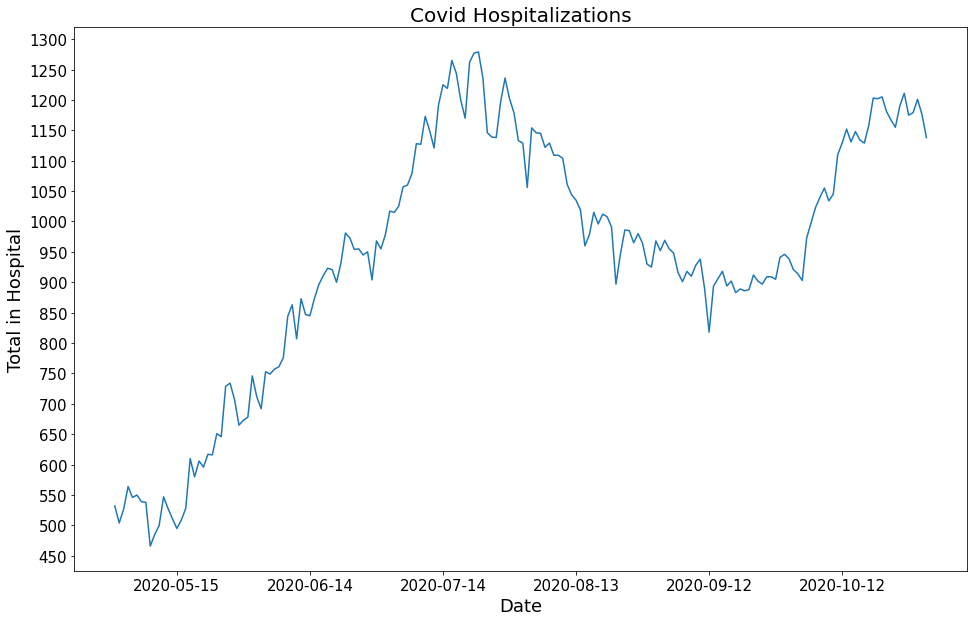

In [18]:
#Plotted Hospitalizations on a line graph
fig, axs = plt.subplots(figsize=(16,10))
axs.plot(df_NCR['Date'], df_NCR['Hospitalizations'])
plt.title('Covid Hospitalizations', fontsize=20)
axs.set_xlabel('Date', fontsize=18)
axs.set_ylabel('Total in Hospital', fontsize=18)
axs.xaxis.set_major_locator(plt.MaxNLocator(8))
axs.yaxis.set_major_locator(plt.MaxNLocator(20))
axs.tick_params(labelsize=15)
plt.show()

In [19]:
len(df_NCR['Hospitalizations'])

184

In [25]:
#created an incremental count for date data
number = []
for i in range(len(df_NCR['Hospitalizations'])):
    number.append(i)

In [26]:
df_NCR['Date1']=number
df_NCR

<ipython-input-26-74d8897552dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NCR['Date1']=number


,Date,Hospitalizations,Adult ICU COVID-19 Patients,Suspected Patient Admitted - Last 24 Hours,Confirmed Patient Admitted - Last 24 Hours,Date1
30,2020-10-31,1138.0,335.0,263.0,142.0,0
31,2020-10-30,1176.0,349.0,276.0,155.0,1
32,2020-10-29,1201.0,343.0,289.0,152.0,2
33,2020-10-28,1179.0,339.0,278.0,153.0,3
34,2020-10-27,1175.0,325.0,293.0,145.0,4
...,...,...,...,...,...,...
209,2020-05-05,546.0,NaN,NaN,NaN,179
210,2020-05-04,564.0,NaN,NaN,NaN,180
211,2020-05-03,527.0,NaN,NaN,NaN,181
212,2020-05-02,504.0,NaN,NaN,NaN,182


In [22]:
#Performed linear regression
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = df_NCR['Date1'].values
y_vals = df_NCR['Hospitalizations']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hospitalizations   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     133.4
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.67e-23
Time:                        12:23:20   Log-Likelihood:                -1191.2
No. Observations:                 184   AIC:                             2386.
Df Residuals:                     182   BIC:                             2393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1173.7410     23.148     50.706      0.000    1128.068    1219.414
x1            -2.5272      0.219    -11.551      0.000      -2.959      -2.095
==============================================================================
Omnibus:                       12.676   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.100
Skew:                           0.476   Prob(JB):                      0.00641
Kurtosis:                       2.359   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df_NCR['Date1']),
                     np.max(df_NCR['Date1']), 100)

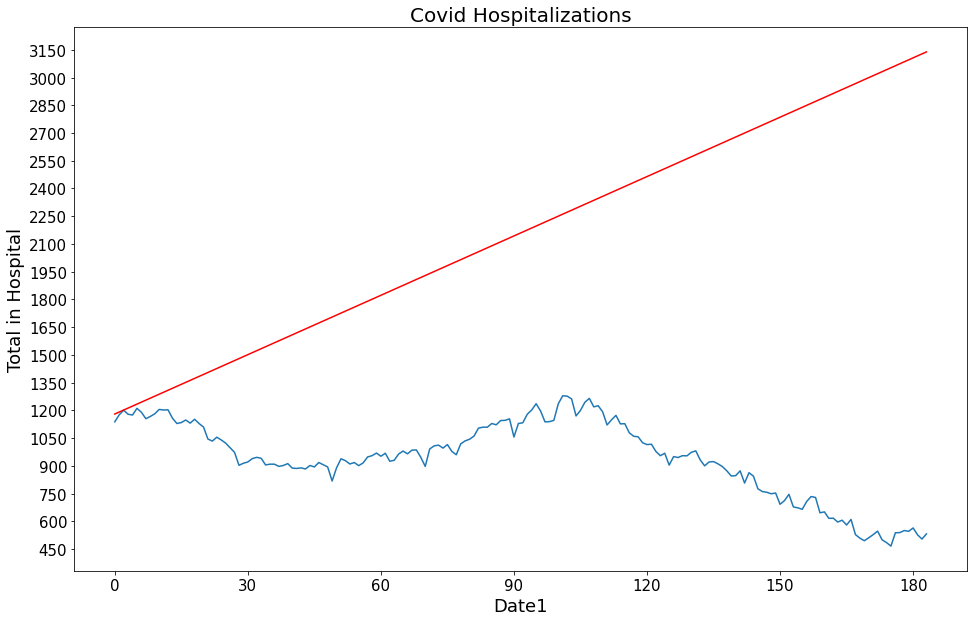

In [66]:
#Used Date too many times, something happened, takes too long to load all the data, graph in report was correct
fig, axs = plt.subplots(figsize=(16,10))
axs.plot(df_NCR['Date1'], df_NCR['Hospitalizations'])

axs.plot(x_plot, x_plot*b1 + b0, color='red')

plt.title('Covid Hospitalizations', fontsize=20)
axs.set_xlabel('Date1', fontsize=18)
axs.set_ylabel('Total in Hospital', fontsize=18)
axs.xaxis.set_major_locator(plt.MaxNLocator(8))
axs.yaxis.set_major_locator(plt.MaxNLocator(20))
axs.tick_params(labelsize=15)
plt.show()

In [29]:
#Restricted 'Early' timeframe for North Carolina
sedate=pd.Timestamp(date(2020,4,30))
eedate=pd.Timestamp(date(2020,7,31))

df_NCRe=df_NC[(df_NC['Date']>sedate) & (df_NC['Date']<eedate)]
df_NCRe

,Date,Hospitalizations,Adult ICU COVID-19 Patients,Suspected Patient Admitted - Last 24 Hours,Confirmed Patient Admitted - Last 24 Hours
123,2020-07-30,1179.0,350.0,405.0,113.0
124,2020-07-29,1202.0,345.0,468.0,136.0
125,2020-07-28,1236.0,348.0,414.0,131.0
126,2020-07-27,1197.0,350.0,312.0,108.0
127,2020-07-26,1138.0,343.0,311.0,110.0
...,...,...,...,...,...
209,2020-05-05,546.0,NaN,NaN,NaN
210,2020-05-04,564.0,NaN,NaN,NaN
211,2020-05-03,527.0,NaN,NaN,NaN
212,2020-05-02,504.0,NaN,NaN,NaN


In [30]:
Time = []
for i in range(len(df_NCRe['Hospitalizations'])):
    Time.append("Early")

In [31]:
#Created percentage by population for North Carolina Data
percentnc = []
for i in range(len(df_NCRe['Hospitalizations'])):
    percentnc.append(i/100)

In [32]:
df_NCRe['Mark']=Time
df_NCRe['PopPer']=percentnc

df_NCRe

<ipython-input-32-dc8caa30de39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NCRe['Mark']=Time
<ipython-input-32-dc8caa30de39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NCRe['PopPer']=percentnc


,Date,Hospitalizations,Adult ICU COVID-19 Patients,Suspected Patient Admitted - Last 24 Hours,Confirmed Patient Admitted - Last 24 Hours,Mark,PopPer
123,2020-07-30,1179.0,350.0,405.0,113.0,Early,0.00
124,2020-07-29,1202.0,345.0,468.0,136.0,Early,0.01
125,2020-07-28,1236.0,348.0,414.0,131.0,Early,0.02
126,2020-07-27,1197.0,350.0,312.0,108.0,Early,0.03
127,2020-07-26,1138.0,343.0,311.0,110.0,Early,0.04
...,...,...,...,...,...,...,...
209,2020-05-05,546.0,NaN,NaN,NaN,Early,0.86
210,2020-05-04,564.0,NaN,NaN,NaN,Early,0.87
211,2020-05-03,527.0,NaN,NaN,NaN,Early,0.88
212,2020-05-02,504.0,NaN,NaN,NaN,Early,0.89


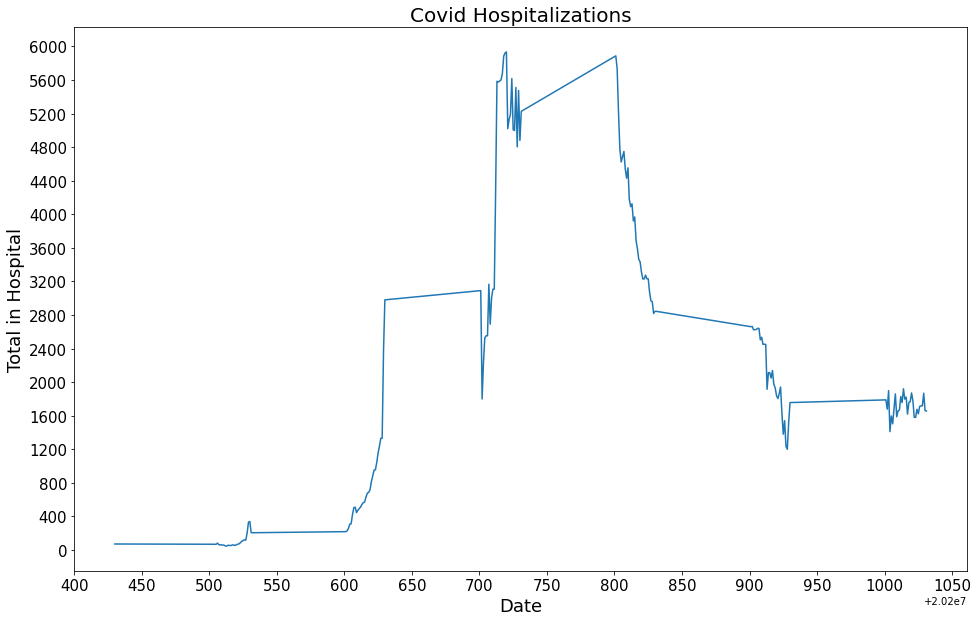

In [33]:
fig, axs = plt.subplots(figsize=(16,10))
axs.plot(df_GTR['YYYYMMDD'], df_GTR['GP_Hospitalisations'])
plt.title('Covid Hospitalizations', fontsize=20)
axs.set_xlabel('Date', fontsize=18)
axs.set_ylabel('Total in Hospital', fontsize=18)
axs.xaxis.set_major_locator(plt.MaxNLocator(15))
axs.yaxis.set_major_locator(plt.MaxNLocator(20))
axs.tick_params(labelsize=15)
plt.show()

In [34]:

numberg = []
for i in range(len(df_GTR['GP_Hospitalisations'])):
    numberg.append(i)

In [35]:
df_GTR['Date1']=numberg
df_GTR

<ipython-input-35-b8eb2e775edd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GTR['Date1']=numberg


,date,YYYYMMDD,Ekurhulene_Cases,Johannesburg_Cases,Sedibeng_Cases,Tshwane_Cases,WestRand_Cases,GPUnallocated_Cases,GP Cases,GP_Recoveries,GP_Hospitalisations,GP_Deaths,source,Comment,Date1
19,30-04-2020,20200430,319.0,840.0,16.0,172.0,44.0,55.0,1446,948.0,72.0,NaN,https://twitter.com/GautengHealth/status/12562...,NaN,0
20,1/5/20,20200501,328.0,865.0,18.0,187.0,45.0,64.0,1507,948.0,70.0,12.0,https://twitter.com/GautengHealth/status/12565...,NaN,1
21,2/5/20,20200502,349.0,920.0,19.0,201.0,45.0,64.0,1598,979.0,70.0,NaN,https://twitter.com/GautengHealth/status/12568...,NaN,2
22,3/5/20,20200503,358.0,935.0,21.0,201.0,45.0,64.0,1624,1015.0,69.0,NaN,https://twitter.com/GautengHealth/status/12572...,NaN,3
23,4/5/20,20200504,360.0,954.0,21.0,211.0,51.0,64.0,1661,1026.0,68.0,NaN,https://twitter.com/GautengHealth/status/12576...,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,27-10-2020,20201027,50684.0,90678.0,15349.0,51564.0,14539.0,4745.0,227559,207060.0,1718.0,4711.0,https://twitter.com/GautengHealth/status/13214...,NaN,180
200,28-10-2020,20201028,50744.0,90753.0,15363.0,51679.0,14549.0,4745.0,227833,207211.0,1718.0,4713.0,GDOH Media Release 29 October 2020,NaN,181
201,29-10-2020,20201029,50793.0,90864.0,15376.0,51782.0,14566.0,4747.0,228128,207316.0,1868.0,4717.0,https://twitter.com/GautengHealth/status/13221...,NaN,182
202,30-10-2020,20201030,50858.0,90958.0,15396.0,51881.0,14590.0,4749.0,228432,207697.0,1661.0,4719.0,GDOH Media Release 31 October 2020,NaN,183


In [36]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = df_GTR['Date1'].values
y_vals = df_GTR['GP_Hospitalisations']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     GP_Hospitalisations   R-squared:                       0.112
Model:                             OLS   Adj. R-squared:                  0.107
Method:                  Least Squares   F-statistic:                     22.97
Date:                 Wed, 23 Dec 2020   Prob (F-statistic):           3.40e-06
Time:                         12:25:30   Log-Likelihood:                -1628.9
No. Observations:                  185   AIC:                             3262.
Df Residuals:                      183   BIC:                             3268.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1180.3351    237.530      4.969      0.000     711.686    1648.984
x1            10.7012      2.233      4.792      0.000       6.296      15.107
==============================================================================
Omnibus:                       26.824   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.373
Skew:                           1.067   Prob(JB):                     2.08e-08
Kurtosis:                       2.817   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df_GTR['Date1']),
                     np.max(df_GTR['Date1']), 100)

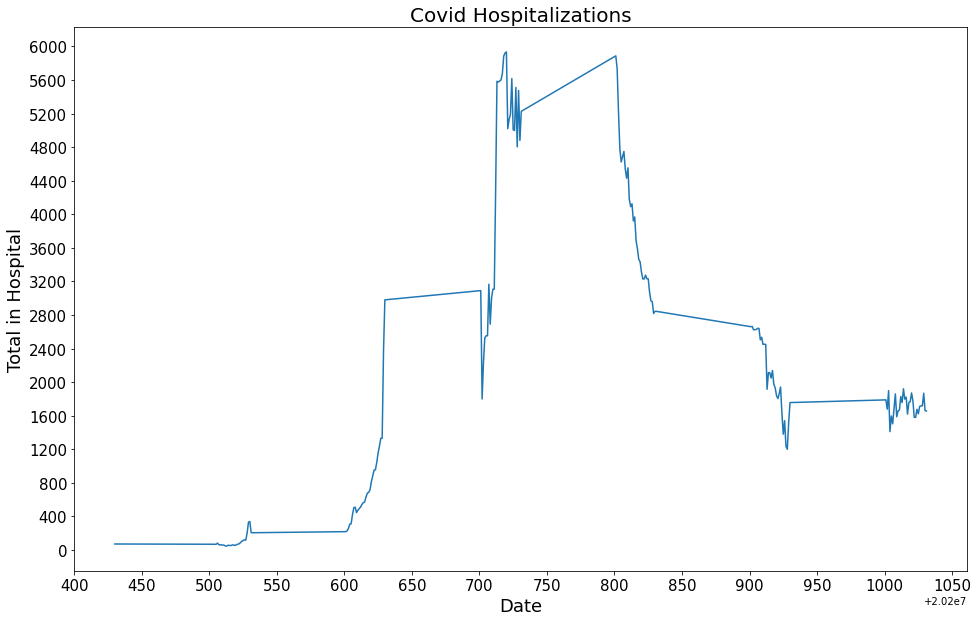

In [38]:
fig, axs = plt.subplots(figsize=(16,10))
axs.plot(df_GTR['YYYYMMDD'], df_GTR['GP_Hospitalisations'])

#axs.plot(x_plot, x_plot*b1 + b0, color='red')

plt.title('Covid Hospitalizations', fontsize=20)
axs.set_xlabel('Date', fontsize=18)
axs.set_ylabel('Total in Hospital', fontsize=18)
axs.xaxis.set_major_locator(plt.MaxNLocator(15))
axs.yaxis.set_major_locator(plt.MaxNLocator(20))
axs.tick_params(labelsize=15)
plt.show()

In [39]:
#Restricted 'Early' timeframe for Gauteng data
may=df_GT['YYYYMMDD']>=20200430
jul=df_GT['YYYYMMDD']<20200801
df_GTRe=df_GT[may & jul]


In [383]:
df_GTRe

,date,YYYYMMDD,Ekurhulene_Cases,Johannesburg_Cases,Sedibeng_Cases,Tshwane_Cases,WestRand_Cases,GPUnallocated_Cases,GP Cases,GP_Recoveries,GP_Hospitalisations,GP_Deaths,source,Comment
19,30-04-2020,20200430,319.0,840.0,16.0,172.0,44.0,55.0,1446,948.0,72.0,NaN,https://twitter.com/GautengHealth/status/12562...,NaN
20,1/5/20,20200501,328.0,865.0,18.0,187.0,45.0,64.0,1507,948.0,70.0,12.0,https://twitter.com/GautengHealth/status/12565...,NaN
21,2/5/20,20200502,349.0,920.0,19.0,201.0,45.0,64.0,1598,979.0,70.0,NaN,https://twitter.com/GautengHealth/status/12568...,NaN
22,3/5/20,20200503,358.0,935.0,21.0,201.0,45.0,64.0,1624,1015.0,69.0,NaN,https://twitter.com/GautengHealth/status/12572...,NaN
23,4/5/20,20200504,360.0,954.0,21.0,211.0,51.0,64.0,1661,1026.0,68.0,NaN,https://twitter.com/GautengHealth/status/12576...,NaN
24,5/5/20,20200505,366.0,971.0,21.0,224.0,51.0,64.0,1697,1036.0,68.0,NaN,https://twitter.com/GautengHealth/status/12580...,NaN
25,6/5/20,20200506,370.0,979.0,21.0,235.0,51.0,64.0,1720,1053.0,82.0,NaN,https://twitter.com/GautengHealth/status/12583...,NaN
26,7/5/20,20200507,398.0,1009.0,21.0,258.0,54.0,64.0,1804,1197.0,66.0,NaN,https://twitter.com/GautengHealth/status/12586...,NaN
27,8/5/20,20200508,402.0,1029.0,22.0,278.0,55.0,65.0,1851,1247.0,60.0,NaN,https://twitter.com/GautengHealth/status/12590...,NaN
28,9/5/20,20200509,426.0,1057.0,22.0,283.0,56.0,66.0,1910,1293.0,63.0,18.0,https://twitter.com/GautengHealth/status/12594...,NaN


In [40]:
data1=df_NCRe[['PopPer','Mark']]
data1

,PopPer,Mark
123,0.00,Early
124,0.01,Early
125,0.02,Early
126,0.03,Early
127,0.04,Early
...,...,...
209,0.86,Early
210,0.87,Early
211,0.88,Early
212,0.89,Early


In [61]:
mean1 = np.mean(data1)
mean1

PopPer    0.45
dtype: float64

In [41]:
#Created 'Early' timeframe for Gauteng data
Time2 = []
for i in range(len(df_GTRe['GP_Hospitalisations'])):
    Time2.append("Early")

In [42]:
percentg = []
for i in range(len(df_GTRe['GP_Hospitalisations'])):
    percentg.append(i/100)

In [43]:
#Created percentage of population column for Gauteng data
df_GTRe['Mark']=Time2
df_GTRe['PopPer']=percentg
df_GTRe

<ipython-input-43-c74c295a12cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GTRe['Mark']=Time2
<ipython-input-43-c74c295a12cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GTRe['PopPer']=percentg


,date,YYYYMMDD,Ekurhulene_Cases,Johannesburg_Cases,Sedibeng_Cases,Tshwane_Cases,WestRand_Cases,GPUnallocated_Cases,GP Cases,GP_Recoveries,GP_Hospitalisations,GP_Deaths,source,Comment,Mark,PopPer
19,30-04-2020,20200430,319.0,840.0,16.0,172.0,44.0,55.0,1446,948.0,72.0,NaN,https://twitter.com/GautengHealth/status/12562...,NaN,Early,0.00
20,1/5/20,20200501,328.0,865.0,18.0,187.0,45.0,64.0,1507,948.0,70.0,12.0,https://twitter.com/GautengHealth/status/12565...,NaN,Early,0.01
21,2/5/20,20200502,349.0,920.0,19.0,201.0,45.0,64.0,1598,979.0,70.0,NaN,https://twitter.com/GautengHealth/status/12568...,NaN,Early,0.02
22,3/5/20,20200503,358.0,935.0,21.0,201.0,45.0,64.0,1624,1015.0,69.0,NaN,https://twitter.com/GautengHealth/status/12572...,NaN,Early,0.03
23,4/5/20,20200504,360.0,954.0,21.0,211.0,51.0,64.0,1661,1026.0,68.0,NaN,https://twitter.com/GautengHealth/status/12576...,NaN,Early,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,27-07-2020,20200727,36297.0,68220.0,10307.0,31394.0,10728.0,5373.0,162319,97234.0,5511.0,1625.0,https://twitter.com/GautengHealth/status/12877...,NaN,Early,0.88
108,28-07-2020,20200728,36755.0,69055.0,10466.0,32036.0,10841.0,5431.0,164584,102519.0,4804.0,1680.0,https://twitter.com/GautengHealth/status/12885...,NaN,Early,0.89
109,29-07-2020,20200729,37678.0,70330.0,10722.0,33017.0,11059.0,5563.0,168369,106360.0,5476.0,1836.0,https://twitter.com/GautengHealth/status/12888...,NaN,Early,0.90
110,30-07-2020,20200730,38273.0,71322.0,11023.0,34050.0,11274.0,5632.0,171574,110016.0,4881.0,1932.0,https://twitter.com/GautengHealth/status/12892...,Sedibeng recovery figures: apparent reallocati...,Early,0.91


In [44]:
data2=df_GTRe[['PopPer','Mark']]
data2

,PopPer,Mark
19,0.00,Early
20,0.01,Early
21,0.02,Early
22,0.03,Early
23,0.04,Early
...,...,...
107,0.88,Early
108,0.89,Early
109,0.90,Early
110,0.91,Early


In [62]:
mean2 = np.mean(data2)
mean2

PopPer    0.46
dtype: float64

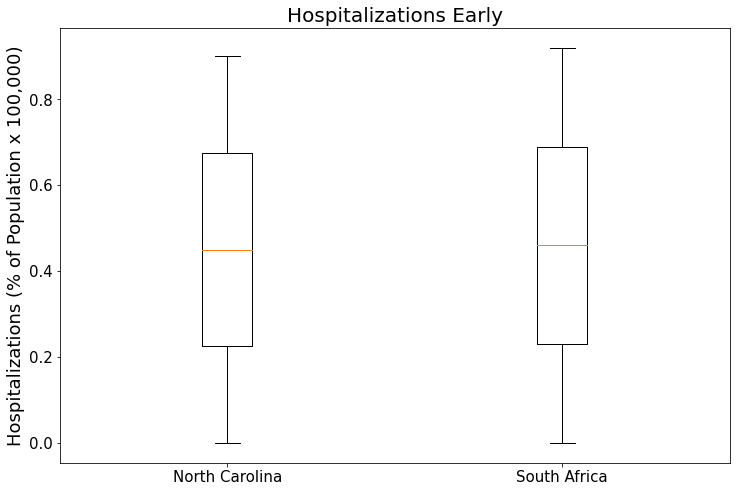

In [45]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([data1['PopPer'],data2['PopPer']])
plt.title('Hospitalizations Early', fontsize=20)
axs.set_xticklabels(['North Carolina','South Africa'])
axs.set_ylabel('Hospitalizations (% of Population x 100,000)', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()


In [46]:
sedate=pd.Timestamp(date(2020,8,1))
eedate=pd.Timestamp(date(2020,10,31))

df_NCRL=df_NC[(df_NC['Date']>sedate) & (df_NC['Date']<eedate)]
df_NCRL

,Date,Hospitalizations,Adult ICU COVID-19 Patients,Suspected Patient Admitted - Last 24 Hours,Confirmed Patient Admitted - Last 24 Hours
31,2020-10-30,1176.0,349.0,276.0,155.0
32,2020-10-29,1201.0,343.0,289.0,152.0
33,2020-10-28,1179.0,339.0,278.0,153.0
34,2020-10-27,1175.0,325.0,293.0,145.0
35,2020-10-26,1211.0,329.0,231.0,131.0
...,...,...,...,...,...
116,2020-08-06,1122.0,339.0,401.0,123.0
117,2020-08-05,1145.0,333.0,396.0,117.0
118,2020-08-04,1146.0,347.0,439.0,134.0
119,2020-08-03,1154.0,336.0,413.0,88.0


In [47]:
Time3 = []
for i in range(len(df_NCRL['Hospitalizations'])):
    Time3.append("Late")

In [48]:
percentncl = []
for i in range(len(df_NCRL['Hospitalizations'])):
    percentncl.append(i/100)

In [49]:
df_NCRL['Mark']=Time3
df_NCRL['PopPer']=percentncl
df_NCRL

<ipython-input-49-7e6d7b07738d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NCRL['Mark']=Time3
<ipython-input-49-7e6d7b07738d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NCRL['PopPer']=percentncl


,Date,Hospitalizations,Adult ICU COVID-19 Patients,Suspected Patient Admitted - Last 24 Hours,Confirmed Patient Admitted - Last 24 Hours,Mark,PopPer
31,2020-10-30,1176.0,349.0,276.0,155.0,Late,0.00
32,2020-10-29,1201.0,343.0,289.0,152.0,Late,0.01
33,2020-10-28,1179.0,339.0,278.0,153.0,Late,0.02
34,2020-10-27,1175.0,325.0,293.0,145.0,Late,0.03
35,2020-10-26,1211.0,329.0,231.0,131.0,Late,0.04
...,...,...,...,...,...,...,...
116,2020-08-06,1122.0,339.0,401.0,123.0,Late,0.85
117,2020-08-05,1145.0,333.0,396.0,117.0,Late,0.86
118,2020-08-04,1146.0,347.0,439.0,134.0,Late,0.87
119,2020-08-03,1154.0,336.0,413.0,88.0,Late,0.88


In [50]:
data3=df_NCRL[['PopPer','Mark']]
data3

,PopPer,Mark
31,0.00,Late
32,0.01,Late
33,0.02,Late
34,0.03,Late
35,0.04,Late
...,...,...
116,0.85,Late
117,0.86,Late
118,0.87,Late
119,0.88,Late


In [63]:
mean3 = np.mean(data3)
mean3

PopPer    0.445
dtype: float64

In [51]:
aug=df_GT['YYYYMMDD']>=20200801
oct=df_GT['YYYYMMDD']<20201101
df_GTRL=df_GT[aug & oct]
df_GTRL

,date,YYYYMMDD,Ekurhulene_Cases,Johannesburg_Cases,Sedibeng_Cases,Tshwane_Cases,WestRand_Cases,GPUnallocated_Cases,GP Cases,GP_Recoveries,GP_Hospitalisations,GP_Deaths,source,Comment
112,1/8/20,20200801,NaN,NaN,NaN,NaN,NaN,NaN,178119,126784.0,5888.0,2075.0,https://twitter.com/GautengHealth/status/12899...,GDOH did not release figures due to audit/harm...
113,2/8/20,20200802,NaN,NaN,NaN,NaN,NaN,NaN,180532,NaN,5734.0,2115.0,NaN,GDOH did not release figures
114,3/8/20,20200803,NaN,NaN,NaN,NaN,NaN,NaN,181946,NaN,5213.0,2152.0,NaN,GDOH did not release figures
115,4/8/20,20200804,40863.0,74962.0,12056.0,37554.0,11902.0,NaN,183090,NaN,4777.0,2268.0,NaN,GDOH did not release figures
116,5/8/20,20200805,41393.0,75654.0,12210.0,38023.0,12028.0,5974.0,185282,129375.0,4624.0,2313.0,https://twitter.com/GautengHealth/status/12913...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,27-10-2020,20201027,50684.0,90678.0,15349.0,51564.0,14539.0,4745.0,227559,207060.0,1718.0,4711.0,https://twitter.com/GautengHealth/status/13214...,NaN
200,28-10-2020,20201028,50744.0,90753.0,15363.0,51679.0,14549.0,4745.0,227833,207211.0,1718.0,4713.0,GDOH Media Release 29 October 2020,NaN
201,29-10-2020,20201029,50793.0,90864.0,15376.0,51782.0,14566.0,4747.0,228128,207316.0,1868.0,4717.0,https://twitter.com/GautengHealth/status/13221...,NaN
202,30-10-2020,20201030,50858.0,90958.0,15396.0,51881.0,14590.0,4749.0,228432,207697.0,1661.0,4719.0,GDOH Media Release 31 October 2020,NaN


In [55]:
Time4 = []
for i in range(len(df_GTRL['GP_Hospitalisations'])):
    Time4.append("Late")

In [56]:
percentgL = []
for i in range(len(df_GTRL['GP_Hospitalisations'])):
    percentgL.append(i/100)

In [57]:
df_GTRL['Mark']=Time4
df_GTRL['PopPer']=percentgL
df_GTRL

<ipython-input-57-5e590d30f2d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GTRL['Mark']=Time4
<ipython-input-57-5e590d30f2d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GTRL['PopPer']=percentgL


,date,YYYYMMDD,Ekurhulene_Cases,Johannesburg_Cases,Sedibeng_Cases,Tshwane_Cases,WestRand_Cases,GPUnallocated_Cases,GP Cases,GP_Recoveries,GP_Hospitalisations,GP_Deaths,source,Comment,Mark,PopPer
112,1/8/20,20200801,NaN,NaN,NaN,NaN,NaN,NaN,178119,126784.0,5888.0,2075.0,https://twitter.com/GautengHealth/status/12899...,GDOH did not release figures due to audit/harm...,Late,0.00
113,2/8/20,20200802,NaN,NaN,NaN,NaN,NaN,NaN,180532,NaN,5734.0,2115.0,NaN,GDOH did not release figures,Late,0.01
114,3/8/20,20200803,NaN,NaN,NaN,NaN,NaN,NaN,181946,NaN,5213.0,2152.0,NaN,GDOH did not release figures,Late,0.02
115,4/8/20,20200804,40863.0,74962.0,12056.0,37554.0,11902.0,NaN,183090,NaN,4777.0,2268.0,NaN,GDOH did not release figures,Late,0.03
116,5/8/20,20200805,41393.0,75654.0,12210.0,38023.0,12028.0,5974.0,185282,129375.0,4624.0,2313.0,https://twitter.com/GautengHealth/status/12913...,NaN,Late,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,27-10-2020,20201027,50684.0,90678.0,15349.0,51564.0,14539.0,4745.0,227559,207060.0,1718.0,4711.0,https://twitter.com/GautengHealth/status/13214...,NaN,Late,0.87
200,28-10-2020,20201028,50744.0,90753.0,15363.0,51679.0,14549.0,4745.0,227833,207211.0,1718.0,4713.0,GDOH Media Release 29 October 2020,NaN,Late,0.88
201,29-10-2020,20201029,50793.0,90864.0,15376.0,51782.0,14566.0,4747.0,228128,207316.0,1868.0,4717.0,https://twitter.com/GautengHealth/status/13221...,NaN,Late,0.89
202,30-10-2020,20201030,50858.0,90958.0,15396.0,51881.0,14590.0,4749.0,228432,207697.0,1661.0,4719.0,GDOH Media Release 31 October 2020,NaN,Late,0.90


In [52]:
data3=df_NCRL[['PopPer','Mark']]
data3

,PopPer,Mark
31,0.00,Late
32,0.01,Late
33,0.02,Late
34,0.03,Late
35,0.04,Late
...,...,...
116,0.85,Late
117,0.86,Late
118,0.87,Late
119,0.88,Late


In [58]:
data4=df_GTRL[['PopPer','Mark']]
data4

,PopPer,Mark
112,0.00,Late
113,0.01,Late
114,0.02,Late
115,0.03,Late
116,0.04,Late
...,...,...
199,0.87,Late
200,0.88,Late
201,0.89,Late
202,0.90,Late


In [64]:
mean4 = np.mean(data4)
mean4

PopPer    0.455
dtype: float64

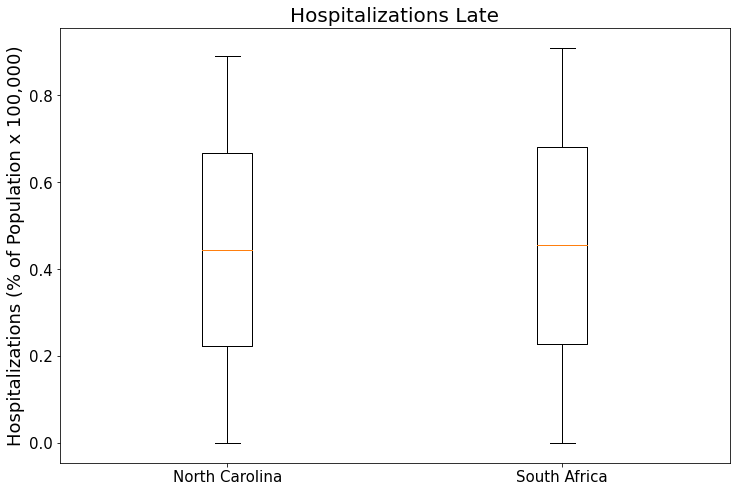

In [59]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([data3['PopPer'],data4['PopPer']])
plt.title('Hospitalizations Late', fontsize=20)
axs.set_xticklabels(['North Carolina','South Africa'])
axs.set_ylabel('Hospitalizations (% of Population x 100,000)', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()


In [371]:
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [372]:
CI_mean_diff(data1['PopPer'], data2['PopPer'])

The average difference is: -0.0010000000000000009
The 95% CI is: (-0.008674475427721989, 0.006674475427721987)


In [373]:
from scipy import stats

t_val, p_val = stats.ttest_ind(data1['PopPer'],
                               data2['PopPer'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: -0.2540002540003813
p-value: 0.7997820901765198


In [374]:
CI_mean_diff(data3['PopPer'], data4['PopPer'])

The average difference is: -0.009999999999999953
The 95% CI is: (-0.08632642394314345, 0.06632642394314354)


In [376]:
from scipy import stats

t_val, p_val = stats.ttest_ind(data3['PopPer'],
                               data4['PopPer'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: -0.25537695922762343
p-value: 0.7987235376286241
